<a href="https://colab.research.google.com/github/FangxuLin/NZ_Stock_Prediction_RNN/blob/main/NZStock_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import math
import sklearn
import sklearn.preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf



```
# This is formatted as code
```

# 1. Libraries and settings

In [ ]:
path01 = '/content/nzxData_01Sep2021.csv'
path02 = '/content/nzxData_02Sep2021.csv'
path03 = '/content/nzxData_03Sep2021.csv'
path06 = '/content/nzxData_06Sep2021.csv'
path07 = '/content/nzxData_07Sep2021.csv'
path08 = '/content/nzxData_08Sep2021.csv'
path09 = '/content/nzxData_09Sep2021.csv'
path10 = '/content/nzxData_10Sep2021.csv'

In [ ]:
data01 = pd.read_csv(path01)
data02 = pd.read_csv(path02)
data03 = pd.read_csv(path03)
data06 = pd.read_csv(path06)
data07 = pd.read_csv(path07)
data08 = pd.read_csv(path08)
data09 = pd.read_csv(path09)
data10 = pd.read_csv(path10)

In [ ]:
data01.head()

,Code,Company,Price,Change,Volume,Value,Capitalisation
0,AFI,Australian Foundation Investment Company Limited,$8.730,-$0.010 / -0.11%,"1,110","$9,758.71","$10,703,253,493"
1,AMP,AMP Limited,$1.140,$0.000 / 0.00%,"15,514","$17,707.16","$3,917,723,135"
2,ANZ,Australia and New Zealand Banking Group Limited,$28.990,-$0.020 / -0.07%,"28,778","$827,850.09","$82,294,466,216"
3,DOW,Downer EDI Limited,$0.000,$0.000 / 0.00%,0,$0.00,$0
4,MHJ,Michael Hill International Limited,$0.870,$0.010 / 1.16%,"1,241,671","$1,068,254.48","$337,808,275"


In [ ]:
data01.describe()

,Code,Company,Price,Change,Volume,Value,Capitalisation
count,186,186,186,186,186,186,186
unique,185,179,174,135,173,173,185
top,WHS,Millennium & Copthorne Hotels New Zealand Limited,$0.001,$0.000 / 0.00%,0,$0.00,"$1,311,066,994"
freq,2,2,3,47,13,13,2


In [ ]:
# insert the 'Date' column into the file
files_dates = {
    'nzxData_01Sep2021.csv': '2021-09-01',
    'nzxData_02Sep2021.csv': '2021-09-02',
    'nzxData_03Sep2021.csv': '2021-09-03',
    'nzxData_06Sep2021.csv': '2021-09-06',
    'nzxData_07Sep2021.csv': '2021-09-07',
    'nzxData_08Sep2021.csv': '2021-09-08',
    'nzxData_09Sep2021.csv': '2021-09-09',
    'nzxData_10Sep2021.csv': '2021-09-10'

}


all_data = []
# Read the file individually, and add the date
for file, date in files_dates.items():
    df = pd.read_csv(file)
    df['Date'] = date
    all_data.append(df)
# Merge all date into one dateframe
combined_data = pd.concat(all_data)
print(len(combined_data))
print(combined_data.iloc[185:190])


1484
    Code                                           Company    Price  \
185  ZEL                                  Z Energy Limited   $3.530   
0    AFI  Australian Foundation Investment Company Limited   $8.800   
1    AMP                                       AMP Limited   $1.130   
2    ANZ   Australia and New Zealand Banking Group Limited  $29.080   
3    DOW                                Downer EDI Limited   $0.000   

               Change     Volume          Value   Capitalisation        Date  
185    $0.020 / 0.57%  1,131,911  $3,984,716.56   $1,836,083,501  2021-09-01  
0      $0.070 / 0.80%      5,793     $50,878.73  $10,789,075,686  2021-09-02  
1    -$0.010 / -0.88%     14,317     $16,434.76   $3,883,357,142  2021-09-02  
2      $0.090 / 0.31%     19,540    $568,214.01  $82,549,950,934  2021-09-02  
3      $0.000 / 0.00%          0          $0.00               $0  2021-09-02  


In [ ]:
combined_data.describe()

,Code,Company,Price,Change,Volume,Value,Capitalisation,Date
count,1484,1484,1484,1484,1484,1484,1484,1484
unique,185,179,809,819,1193,1199,1038,8
top,WHS,General Capital Limited,$0.001,$0.000 / 0.00%,0,$0.00,"$4,119,156",2021-09-02
freq,9,16,25,527,185,282,9,188


In [ ]:
combined_data.head()

,Code,Company,Price,Change,Volume,Value,Capitalisation,Date
0,AFI,Australian Foundation Investment Company Limited,$8.730,-$0.010 / -0.11%,"1,110","$9,758.71","$10,703,253,493",2021-09-01
1,AMP,AMP Limited,$1.140,$0.000 / 0.00%,"15,514","$17,707.16","$3,917,723,135",2021-09-01
2,ANZ,Australia and New Zealand Banking Group Limited,$28.990,-$0.020 / -0.07%,"28,778","$827,850.09","$82,294,466,216",2021-09-01
3,DOW,Downer EDI Limited,$0.000,$0.000 / 0.00%,0,$0.00,$0,2021-09-01
4,MHJ,Michael Hill International Limited,$0.870,$0.010 / 1.16%,"1,241,671","$1,068,254.48","$337,808,275",2021-09-01


In [ ]:
combined_data['Price'] = combined_data['Price'].replace('[\$,]', '', regex=True).astype(float)
combined_data['Volume'] = combined_data['Volume'].replace('[\$,]', '', regex=True).astype(float)
combined_data['Value'] = combined_data['Value'].replace('[\$,]', '', regex=True).astype(float)
combined_data['Capitalisation'] = combined_data['Capitalisation'].replace('[\$,]', '', regex=True).astype(float)

# Data Structure and Basic Statistics
print(combined_data.dtypes)
print('-'*50)

print(combined_data.describe())
print('-'*50)

print(combined_data.head())
print('-'*50)

Code               object
Company            object
Price             float64
Change             object
Volume            float64
Value             float64
Capitalisation    float64
Date               object
dtype: object
--------------------------------------------------
             Price        Volume         Value  Capitalisation
count  1484.000000  1.484000e+03  1.484000e+03    1.484000e+03
mean      4.249224  2.397017e+05  6.832055e+05    2.200403e+09
std       8.549792  1.184783e+06  2.786723e+06    9.625331e+09
min       0.000000  0.000000e+00  0.000000e+00    0.000000e+00
25%       0.857500  1.425000e+03  1.542860e+03    5.545647e+07
50%       2.192500  2.678600e+04  5.183957e+04    2.015292e+08
75%       4.490000  1.443130e+05  3.275952e+05    1.079730e+09
max      98.520000  3.010765e+07  7.850887e+07    9.945552e+10
--------------------------------------------------
  Code                                           Company  Price  \
0  AFI  Australian Foundation Investment C

In [ ]:
#check any null value

any_null = combined_data.isnull().values.any()
print(any_null)

False


In [ ]:
combined_data = combined_data[combined_data['Price'] != 0]
combined_data = combined_data[combined_data['Value'] != 0]

In [ ]:
print(combined_data.head())
print(len(combined_data))

  Code                                           Company  Price  \
0  AFI  Australian Foundation Investment Company Limited   8.73   
1  AMP                                       AMP Limited   1.14   
2  ANZ   Australia and New Zealand Banking Group Limited  28.99   
4  MHJ                Michael Hill International Limited   0.87   
5  WBC                       Westpac Banking Corporation  27.06   

             Change     Volume       Value  Capitalisation        Date  
0  -$0.010 / -0.11%     1110.0     9758.71    1.070325e+10  2021-09-01  
1    $0.000 / 0.00%    15514.0    17707.16    3.917723e+09  2021-09-01  
2  -$0.020 / -0.07%    28778.0   827850.09    8.229447e+10  2021-09-01  
4    $0.010 / 1.16%  1241671.0  1068254.48    3.378083e+08  2021-09-01  
5    $0.230 / 0.86%    18921.0   506164.42    9.927209e+10  2021-09-01  
1202


In [ ]:
print(combined_data[combined_data.duplicated(keep=False)])

duplicate_rows = combined_data[combined_data.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

    Code                      Company  Price          Change   Volume  \
183  WHS  The Warehouse Group Limited   3.78  $0.070 / 1.89%  54766.0   
184  WHS  The Warehouse Group Limited   3.78  $0.070 / 1.89%  54766.0   
33   BGP        Briscoe Group Limited   6.60  $0.100 / 1.54%  18465.0   
34   BGP        Briscoe Group Limited   6.60  $0.100 / 1.54%  18465.0   

         Value  Capitalisation        Date  
183  205537.36    1.311067e+09  2021-09-01  
184  205537.36    1.311067e+09  2021-09-01  
33   120700.71    1.468872e+09  2021-09-02  
34   120700.71    1.468872e+09  2021-09-02  
Duplicate rows:
    Code                      Company  Price          Change   Volume  \
184  WHS  The Warehouse Group Limited   3.78  $0.070 / 1.89%  54766.0   
34   BGP        Briscoe Group Limited   6.60  $0.100 / 1.54%  18465.0   

         Value  Capitalisation        Date  
184  205537.36    1.311067e+09  2021-09-01  
34   120700.71    1.468872e+09  2021-09-02  


In [ ]:
combined_data = combined_data.drop_duplicates()

In [ ]:
def extract_trend(change):
    # 提取股价趋势，上涨返回1，下跌返回-1
    if pd.isna(change):
        return None  # 处理缺失值
    elif '+' in change:
        return 1
    elif '-' in change:
        return -1
    else:
        return 0  # 其他情况，例如没有变化

# 应用函数到 Change 列，并创建新的 Price_Trend 列
combined_data['Price_Trend'] = combined_data['Change'].apply(extract_trend)


In [ ]:
print(combined_data.head())

  Code                                           Company  Price  \
0  AFI  Australian Foundation Investment Company Limited   8.73   
1  AMP                                       AMP Limited   1.14   
2  ANZ   Australia and New Zealand Banking Group Limited  28.99   
4  MHJ                Michael Hill International Limited   0.87   
5  WBC                       Westpac Banking Corporation  27.06   

             Change     Volume       Value  Capitalisation        Date  \
0  -$0.010 / -0.11%     1110.0     9758.71    1.070325e+10  2021-09-01   
1    $0.000 / 0.00%    15514.0    17707.16    3.917723e+09  2021-09-01   
2  -$0.020 / -0.07%    28778.0   827850.09    8.229447e+10  2021-09-01   
4    $0.010 / 1.16%  1241671.0  1068254.48    3.378083e+08  2021-09-01   
5    $0.230 / 0.86%    18921.0   506164.42    9.927209e+10  2021-09-01   

   Price_Trend  
0           -1  
1            0  
2           -1  
4            0  
5            0  


# Normalising the Features

In [ ]:
#Use Random Forests to evaluate those Features that have a significant impact on Price.

features = combined_data.drop(['Price', 'Code', 'Company', 'Date', 'Change'], axis=1)
target = combined_data['Price']  #Price is the target

# Segment the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) #20%test

# Create the RF
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the inport features
importances = rf.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["Importance"]).sort_values("Importance", ascending=False)

print(feature_importances)

                Importance
Value             0.438709
Capitalisation    0.296503
Volume            0.264036
Price_Trend       0.000752


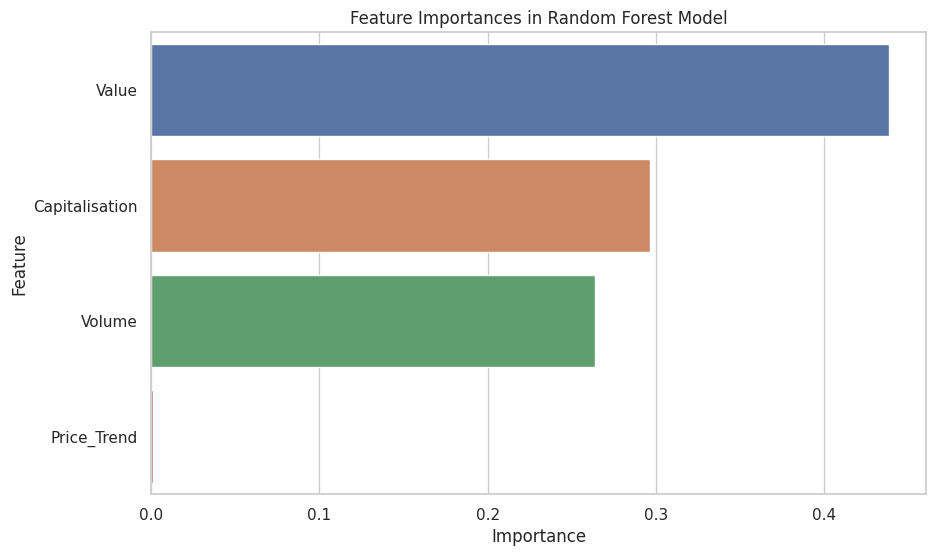

In [ ]:
import seaborn as sns

# feature_importances is a DataFrame containing the importance of features
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)


sns.set(style="whitegrid")

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)


plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')


plt.show()

Normalization Feature

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 初始化MinMaxScaler，并指定特征范围
scaler = MinMaxScaler(feature_range=(0, 1))

# 选择需要归一化的特征列
data_for_model = combined_data[['Price', 'Volume', 'Capitalisation']].values

# 对特征数据进行归一化
features_normalized = scaler.fit_transform(data_for_model)



print(features_normalized)


[[8.86021986e-02 3.68344898e-05 1.07610997e-01]
 [1.03431825e-02 7.33481309e-03 2.34077584e-03]
 [2.94247810e-01 9.55803528e-04 8.27448480e-01]
 ...
 [7.71323298e-02 1.98122391e-03 2.39079684e-02]
 [6.94586831e-02 1.48301169e-04 1.00543939e-03]
 [3.56174951e-02 2.77456708e-02 1.83485117e-02]]


#RNN Time-sequence format

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sorting data in time series
combined_data.sort_values(by='Date', inplace=True)

# Selected feature columns
features = combined_data[['Value', 'Capitalisation', 'Volume']]

# Standardized features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 2  # 2 days
X, y = create_sequences(scaled_features, seq_length)




In [ ]:
print()
print(X.shape)
print(X_train.shape)


(1198, 2, 3)
(1, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Defining the model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(2, 3)))  # 2 days per step, 3 input feature
model.add(SimpleRNN(50))
model.add(Dense(25))
model.add(Dense(1))

# compiler model
model.compile(optimizer='adam', loss='mean_squared_error')

# Divide the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Training Models
model.fit(X_train, y_train, batch_size=1, epochs=10)

#Evaluation Models
model.evaluate(X_test, y_test)

Epoch 1/10
958/958 [==============================] - 3s 2ms/step - loss: 1.2211
Epoch 2/10
958/958 [==============================] - 2s 2ms/step - loss: 1.1652
Epoch 3/10
958/958 [==============================] - 2s 2ms/step - loss: 1.1535
Epoch 4/10
958/958 [==============================] - 2s 2ms/step - loss: 1.1583
Epoch 5/10
958/958 [==============================] - 2s 2ms/step - loss: 1.1450
Epoch 6/10
958/958 [==============================] - 2s 2ms/step - loss: 1.1459
Epoch 7/10
958/958 [==============================] - 2s 2ms/step - loss: 1.1441
Epoch 8/10
958/958 [==============================] - 2s 2ms/step - loss: 1.1440
Epoch 9/10
958/958 [==============================] - 2s 2ms/step - loss: 1.1457
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.4606


0.460629403591156

RNN Optimization

In [ ]:
from tensorflow.keras.layers import Dropout

# Define the model
model = Sequential()
model.add(SimpleRNN(100, return_sequences=True, input_shape=(2, 3)))  # Increased number of neurons
model.add(Dropout(0.2))  # Adding a Dropout Layer
model.add(SimpleRNN(100))
model.add(Dropout(0.2))  # Adding a Dropout Layer
model.add(Dense(50))  # Add additional Dense layers
model.add(Dense(1))

# compiler model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model, enable early stops
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train, y_train, batch_size=32, epochs=20, callbacks=[callback])  # Adjusting batch size and epochs

# evaluation model
model.evaluate(X_test, y_test)


Epoch 1/20
30/30 [==============================] - 1s 3ms/step - loss: 1.2268
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1620
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 1.1666
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1559
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1519
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1547
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1579
Epoch 8/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1410
Epoch 9/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1438
Epoch 10/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1341
Epoch 11/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1339
Epoch 12/20
30/30 [==============================] - 0s 3ms/step - loss: 1.1350
Epoch 13/20
30/30 [==============================

0.446014940738678

# predication

8/8 [==============================] - 1s 2ms/step


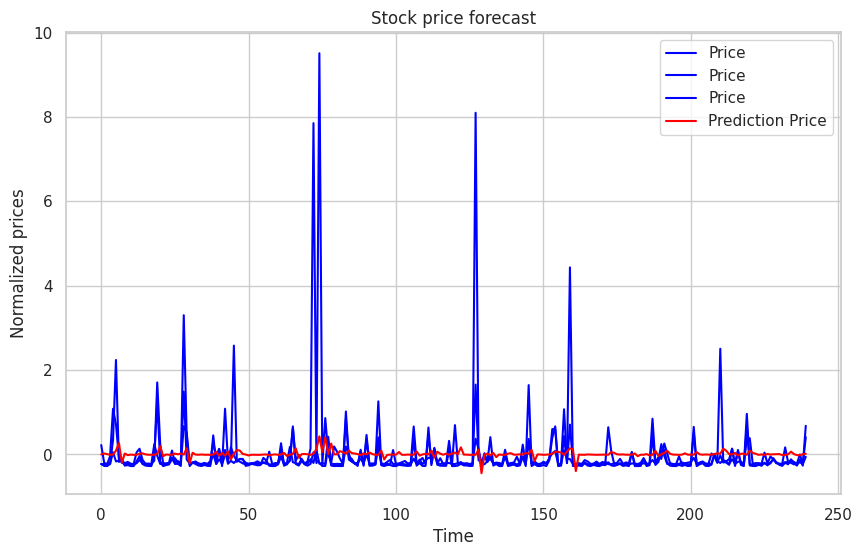

In [ ]:
import matplotlib.pyplot as plt

# Prediction using models
predicted_prices = model.predict(X_test)

# Visualization of forecast results and actual data
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Price', color='blue')
plt.plot(predicted_prices, label='Prediction Price', color='red')
plt.title('Stock price forecast')
plt.xlabel('Time')
plt.ylabel('Normalized prices')
plt.legend()
plt.show()


Individual Prediction

In [ ]:

unique_stocks = combined_data['Code'].unique()  # 获取所有唯一的股票代码

# 分离各只股票的数据
stock_data = {code: combined_data[combined_data['Code'] == code] for code in unique_stocks}

#print(stock_data)


In [ ]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 2, 100)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 2, 100)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 35601 (139.07 KB)
Trainable params: 3560

In [ ]:
import numpy as np

# 假设 X_stock 是您的特征数据
X_stock = np.array(X_stock)


In [ ]:
print(X_stock.shape)

(7, 3)


In [ ]:
print(type(X_stock))


<class 'numpy.ndarray'>


In [ ]:


predicted_prices = {}  # 用于记录每只股票的未来价格预测

for code in stock_data:
    # 选择相应股票的特征数据列，假设特征列的名称为 'Price', 'Volume', 'Capitalisation'
    features_columns = ['Price', 'Volume', 'Capitalisation']

    # 从 combined_data 中提取特征数据
    X_stock = combined_data.loc[combined_data['Code'] == code, features_columns].values

    # 调整输入形状以匹配模型要求
    X_stock = X_stock.reshape(1, X_stock.shape[0], X_stock.shape[1])

    # 使用模型进行预测未来价格
    future_price = model.predict(X_stock)

    # 将预测结果记录到字典中
    predicted_prices[code] = future_price[0][0]

# 选择预测未来价格最高的三只股票
top_3_stocks = sorted(predicted_prices, key=lambda code: predicted_prices[code], reverse=True)[:3]


1/1 [==============================] - 0s 18ms/step


In [ ]:
print(top_3_stocks)

['PHL', 'BGI', 'GEO']


#可视化

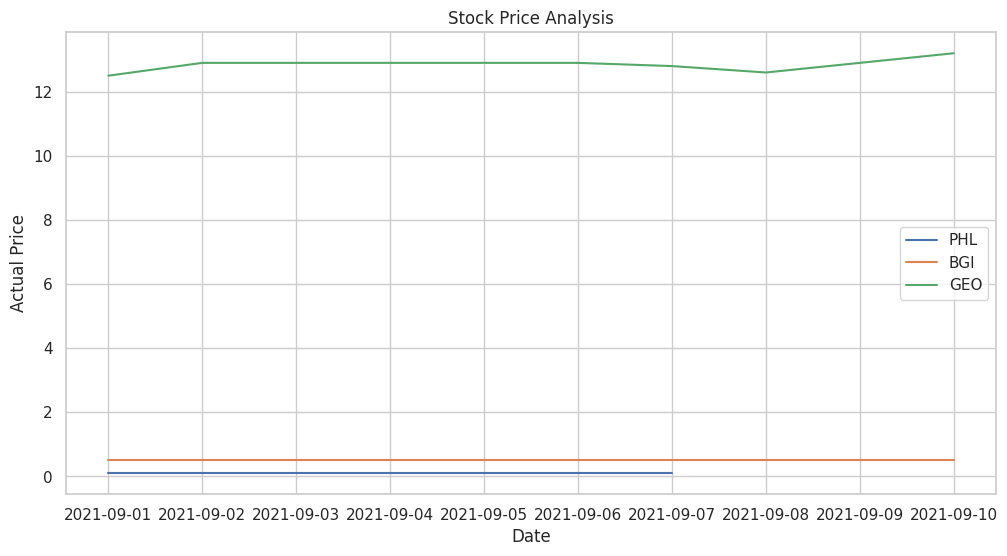

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的数据已经包含在combined_data中

# 假设归一化前的价格范围是 [0, 100]
min_price = 0  # 最小值
max_price = 100  # 最大值

# 提取唯一的股票代码列表
stock_codes = combined_data['Code'].unique()

# 创建一个图表，用于绘制股价走势
plt.figure(figsize=(12, 6))

# 遍历每只股票并绘制价格走势图
for code in top_3_stocks:
    stock_data = combined_data[combined_data['Code'] == code]
    dates = stock_data['Date']
    normalized_prices = stock_data['Price']  # 使用归一化后的价格

    # 将归一化后的价格转换为实际价格
    actual_prices = normalized_prices * (max_price - min_price) + min_price

    plt.plot(dates, actual_prices, label=code)

# 添加标题和标签
plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Actual Price')  # 更新为实际价格

# 添加图例
plt.legend()

# 显示图表
plt.show()


In [ ]:
print(top_3_stocks)

['PHL', 'BGI', 'GEO']


In [ ]:
print((combined_data.loc[combined_data["Code"]== 'PHL'].iloc[0]).tolist()[1])
print((combined_data.loc[combined_data["Code"]== 'BGI'].iloc[0]).tolist()[1])
print((combined_data.loc[combined_data["Code"]== 'GEO'].iloc[0]).tolist()[1])

Promisia Healthcare Limited
Blackwell Global Holdings Limited
Geo Limited
